<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173_Fall2025/blob/main/F25_Class_05_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 5: Natural Language Processing**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 4 Material

* Part 5.1: Introduction to Hugging Face
* Part 5.2: Hugging Face Tokenizers
* **Part 5.3: Hugging Face Datasets**
* Part 5.4: Training Hugging Face models

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


Make sure your GMAIL address is included as the last line in the output above.

## **Hugging Face Tokenizers**

**Hugging Face tokenizers** are essential tools in natural language processing (NLP) that convert text into numerical data, which can be processed by machine learning models. Here's a breakdown of their importance and why they are particularly valuable for computational biologists:

### What are Hugging Face Tokenizers?
1. **Tokenization**: The process of breaking down text into smaller units called tokens. These tokens can be words, subwords, or characters.
2. **Normalization**: Adjusting the text to a standard format, such as lowercasing or removing punctuation.
3. **Encoding**: Converting tokens into numerical representations that models can understand.

### Types of Tokenizers
1. **Word-based Tokenizers**: Split text into words. Simple but can lead to large vocabularies.
2. **Subword Tokenizers**: Break words into smaller units, balancing vocabulary size and representation. Examples include Byte Pair Encoding (BPE) and WordPiece.
3. **Character-based Tokenizers**: Split text into individual characters. Useful for languages with complex morphology.

### Importance for Computational Biologists
1. **Handling Biological Texts**: Biological texts often contain specialized terminology, gene names, and sequences. Tokenizers can effectively process these texts, ensuring accurate representation and analysis.
2. **Data Preprocessing**: Tokenizers help in preparing biological data for machine learning models, enabling tasks like gene sequence analysis, protein structure prediction, and more.
3. **Efficiency**: Subword tokenizers, in particular, can handle rare and complex terms efficiently, reducing the need for extensive vocabularies and improving model performance.
4. **Integration with Models**: Hugging Face tokenizers are designed to work seamlessly with pre-trained models, allowing computational biologists to leverage state-of-the-art NLP techniques for their research.

You can find more detailed information about Hugging Face tokenizers [here](https://huggingface.co/docs/tokenizers/en/index).


Hugging Face Datasets

The Hugging Face hub includes data sets useful for natural language processing (NLP). The Hugging Face library provides functions that allow you to navigate and obtain these data sets. When we access Hugging Face data sets, the data is in a format specific to Hugging Face. In this part, we will explore this format and see how to convert it to Pandas or TensorFlow data.

We begin by installing Hugging Face if needed. It is also essential to install Hugging Face datasets.


In [6]:
# Install Hugging Face

!pip install transformers > /dev/null
!pip install transformers[sentencepiece]  #> /dev/null
!pip install --upgrade datasets  > /dev/null
!pip install huggingface_hub  > /dev/null

### Demostration 1: List Datasets

In Step 1, we create a Hugging Face tokenizer using the `distilbert-base-uncased` as our tokenizer model. It is important to remember that the `distilbert-base-uncased` tokenizer is a **WordPiece** tokenizer. WordPiece tokenizers split words into subword units. They are particularly effective in handling morphological variations and rare words, making them suitable for a wide range of NLP tasks.

In **Exercise 1** we will shift to a **SentencePiece** tokenizer to see how these two tokenizer types differ.

In [8]:
from huggingface_hub import HfApi

# Create an instance of the HfApi class
api = HfApi()

# Get the list of all datasets
all_datasets = list(api.list_datasets())

print(f"Hugging Face hub currently contains {len(all_datasets)} datasets. The first 5 are:")
print("\n".join([dataset.id for dataset in all_datasets[:5]]))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Hugging Face hub currently contains 326559 datasets. The first 5 are:
facebook/natural_reasoning
Congliu/Chinese-DeepSeek-R1-Distill-data-110k
FreedomIntelligence/medical-o1-reasoning-SFT
GeneralReasoning/GeneralThought-195K
KodCode/KodCode-V1


If the code is correct you should see something similar to the following output:

~~~text
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Hugging Face hub currently contains 326559 datasets. The first 5 are:
facebook/natural_reasoning
Congliu/Chinese-DeepSeek-R1-Distill-data-110k
FreedomIntelligence/medical-o1-reasoning-SFT
GeneralReasoning/GeneralThought-195K
KodCode/KodCode-V1
~~~

### Example 1 - Step 2: Tokenize a Sentence

The code in the cell below shows how to tokenize a sentence. For this example, we will use a quotation from Geoffrey Hinton, a pioneer in the field of deep learning:
> "To make a real impact on AI, we need to build systems that can learn from very large amounts of data."
>
This quote emphasizes the importance of data-driven learning in the development and advancement of neural networks and artificial intelligence

In [9]:
# Example 1 - Step 2: Tokenize a sentence

from datasets import load_dataset

emotions = load_dataset("emotion")



README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

If the code is correct, you should see the something similar to the following:

~~~text
{'input_ids': [101, 2000, 2191, 1037, 2613, 4254, 2006, 9932, 1010, 2057, 2342, 2000, 3857, 3001, 2008, 2064, 4553, 2013, 2200, 2312, 8310, 1997, 2951, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
~~~

The result of this tokenization contains two elements:

* **input_ids:** The individual subword indexes, each index uniquely identifies a subword.

* **attention_mask:**  Which values in input_ids are meaningful and not padding. This sentence had no padding, so all elements have an attention mask of "1". Later, we will request the output to be of a fixed length, introducing padding, which always has an attention mask of "0". Though each tokenizer can be implemented differently, the attention mask of a tokenizer is generally either "0" or "1".

Due to subwords and special tokens, the number of tokens may not match the number of words in the source string. We can see the meanings of the individual tokens by converting these IDs back to strings.


A quick scan of the downloaded data set reveals its structure. In this case, Hugging Face already separated the data into training, validation, and test data sets. The training set consists of 16,000 observations, while the test and validation sets contain 2,000 observations. The dataset is a Python dictionary that includes a Dataset object for each of these three divisions. The datasets only contain two columns, the text and the emotion label for each text sample.


In [11]:

emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

You can see a single observation from the training data set here. This observation includes both the text sample and the assigned emotion label. The label is a numeric index representing the assigned emotion.
.

In [12]:
emotions['train'][2]

{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}

If the code is correct, you should see the following output:

~~~text
{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}
~~~


We can display the labels in order of their index labels.


In [13]:
emotions['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


~~~text
{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

 ~~~

Hugging face can provide these data sets in a variety of formats. The following code receives the emotion data set as a Pandas data frame.


In [14]:
import pandas as pd

emotions.set_format(type='pandas')
df = emotions["train"][:]
df[:5]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


If the code is correct, you should see the following table.

We can use the Pandas "apply" function to add the textual label for each observation.


In [15]:
def label_it(row):
  return emotions["train"].features["label"].int2str(row)


df['label_name'] = df["label"].apply(label_it)
df[:5]


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


With the data in Pandas format and textually labeled, we can display a bar chart of the frequency of each of the emotions.

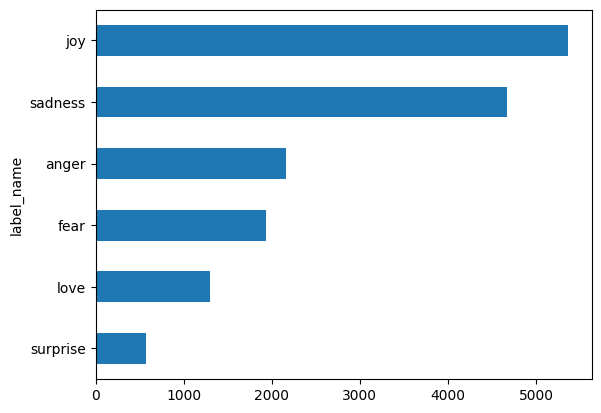

In [16]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.show()


Finally, we utilize Hugging Face tokenizers and data sets together. The following code tokenizes the entire emotion data set. You can see below that the code has transformed the training set into subword tokens that are now ready to be used in conjunction with a transformer for either inference or training.


In [18]:
from transformers import AutoTokenizer


def tokenize(rows):
    return tokenizer(rows['text'], padding=True, truncation=True)


model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

emotions.set_format(type=None)

encoded = tokenize(emotions["train"][:2])

print("**Input IDs**")
for a in encoded.input_ids:
    print(a)


**Input IDs**
[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]


The sentence was broken down into tokens, which include special tokens **[CLS]** and **[SEP]**:

**[CLS]:** This token is added at the beginning of the sequence. It stands for "classification" and is used in tasks like sentence classification.

**Tokens:** The words and punctuation marks from your sentence have been split into individual tokens.

**[SEP]:** This token is added at the end of the sequence to indicate the end of the input. It stands for "separator" and is used in tasks involving multiple sequences.

The tokenization process is essential for preparing text data for model processing. It ensures that the text is transformed into a format that the model can understand and work with.

### Example 1 - Step 4: Convert IDS to Tokens

The cell below shows the code to convert the IDS from Example 1 - Step 3 to tokens.

In [ ]:
# Example 1 - Step 4: Convert ids to tokens

# Convert tokens to ids
tokenizer.convert_ids_to_tokens([0, 100, 101, 102, 103])

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']

#### Explanation of Special Tokens in Tokenizer Output

The output `['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']` consists of special tokens commonly used by tokenizers in the Hugging Face library:

1. **[PAD]**: Padding token used to pad sequences to ensure they are of the same length.
2. **[UNK]**: Unknown token used to represent tokens that are not found in the tokenizer's vocabulary.
3. **[CLS]**: Classification token added at the beginning of the sequence, often used for tasks like sentence classification.
4. **[SEP]**: Separator token used to indicate the end of a sequence or to separate multiple sequences.
5. **[MASK]**: Mask token used in masked language modeling tasks, where certain tokens are masked and the model attempts to predict them.

These special tokens are integral to various NLP tasks, such as sequence classification, question answering, and language modeling. They help the model understand and process input data in a structured way.

## **Comparison of DistilBERT and ALBERT Tokenizers**

For **Exercise 1** we will be comparing the `DistilBERT` tokenizer with the `ALBERT` tokenizer. Here are some of the differences we should expect to see:

#### Tokenization Method
- **DistilBERT**: Utilizes the WordPiece tokenization method. This method breaks down words into subword units and uses the `##` prefix to denote subwords that appear within a word.
- **ALBERT**: Uses the SentencePiece tokenization method. SentencePiece tokenizers break down text into subword units and use the underscore (`▁`) character to indicate spaces before words.

#### Special Tokens
- **DistilBERT**: Uses special tokens such as `[CLS]` (classification token added at the beginning of the sequence) and `[SEP]` (separator token used to indicate the end of a sequence or to separate multiple sequences).
- **ALBERT**: Also uses special tokens like `[CLS]` and `[SEP]`. However, the representation and tokenization of the text might differ due to the SentencePiece method.

#### Vocabulary
- **DistilBERT**: Has a distinct vocabulary file based on the WordPiece tokenization method, which includes tokens with the `##` prefix to denote subwords.
- **ALBERT**: Has a different vocabulary file based on the SentencePiece tokenization method, which includes tokens with the underscore (`▁`) character to denote spaces before words.


### **Exercise 1 - Step 1: Create Tokenizer**

In the cell below, create a Hugging Face tokenizer using the `albert-large-v2` as your tokenizer model.

In [ ]:
from transformers import AutoTokenizer

# Define model
model = "albert-large-v2"

# Setup tokenizer
tokenizer = AutoTokenizer.from_pretrained(model)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

If the code is correct you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_05/class_05_2_image02F.png)

### **Exercise 1 - Step 2: Tokenize a Sentence**

In the cell below tokenize this sentence:

"Hugging Face is on a mission to democratize artificial intelligence through open source and open science, making state-of-the-art models accessible to everyone."

Then print out the result of the tokenization.

In [ ]:
# Example 1 - Step 3: Run sentiment analysis on text

# Create sentence variable
EX_sentence1 = "Hugging Face is on a mission to democratize artificial intelligence through open source and open science, making state-of-the-art models accessible to everyone."

# Tokenize sentence
encoded = tokenizer(EX_sentence1)

# Print result
print(encoded)


{'input_ids': [2, 20676, 276, 25, 27, 21, 1408, 20, 6456, 2952, 6809, 2872, 120, 368, 1267, 17, 368, 762, 15, 544, 146, 8, 1041, 8, 124, 8, 2900, 2761, 7342, 20, 1266, 9, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


If the code is correct, you should see the something similar to the following:

~~~text
{'input_ids': [2, 20676, 276, 25, 27, 21, 1408, 20, 6456, 2952, 6809, 2872, 120, 368, 1267, 17, 368, 762, 15, 544, 146, 8, 1041, 8, 124, 8, 2900, 2761, 7342, 20, 1266, 9, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
~~~

### **Exercise 1 - Step 3: Show Meaning of Tokens**

In the cell below, write the code to show the meanings of the tokens.



In [ ]:
tokenizer.convert_ids_to_tokens(encoded.input_ids)

['[CLS]',
 '▁hugging',
 '▁face',
 '▁is',
 '▁on',
 '▁a',
 '▁mission',
 '▁to',
 '▁democrat',
 'ize',
 '▁artificial',
 '▁intelligence',
 '▁through',
 '▁open',
 '▁source',
 '▁and',
 '▁open',
 '▁science',
 ',',
 '▁making',
 '▁state',
 '-',
 'of',
 '-',
 'the',
 '-',
 'art',
 '▁models',
 '▁accessible',
 '▁to',
 '▁everyone',
 '.',
 '[SEP]']

If the code is correct, you should see the following output:

~~~text
['[CLS]',
 '▁hugging',
 '▁face',
 '▁is',
 '▁on',
 '▁a',
 '▁mission',
 '▁to',
 '▁democrat',
 'ize',
 '▁artificial',
 '▁intelligence',
 '▁through',
 '▁open',
 '▁source',
 '▁and',
 '▁open',
 '▁science',
 ',',
 '▁making',
 '▁state',
 '-',
 'of',
 '-',
 'the',
 '-',
 'art',
 '▁models',
 '▁accessible',
 '▁to',
 '▁everyone',
 '.',
 '[SEP]']
~~~


#### Explanation of Tokenization Output

The output you're seeing is the result of tokenization using the `ALBERT` tokenizer. Here's what each part of the output means:

1. **[CLS]**: This special token is added at the beginning of the sequence. It stands for "classification" and is often used in tasks like sentence classification or as a marker for the start of the sequence.

2. **▁ (underscore character)**: This symbol is used in SentencePiece tokenization to indicate a space before a word. It's a way to handle whitespace in the text.

3. **Tokens**: The words and subwords in your input sentence have been split into tokens. For example:
   - `'▁hugging'` represents the word "hugging" with a preceding space.
   - `'▁face'` represents the word "face" with a preceding space.
   - `'▁is'`, `'▁on'`, `'▁a'`, etc., represent individual words with preceding spaces.
   - `'▁democrat'`, `'ize'` represent the word "democratize," split into two subwords.

4. **Punctuation**: Punctuation marks like commas and periods are kept as separate tokens.

5. **[SEP]**: This special token is added at the end of the sequence to indicate the end of the input. It stands for "separator" and is used in tasks involving multiple sequences.

### Simplified Explanation of the Tokenization Process
- The tokenizer breaks down the sentence into smaller units called tokens.
- Special tokens `[CLS]` and `[SEP]` are added to mark the beginning and end of the sequence.
- Each word and punctuation mark is converted into a token, with subword tokenization applied to handle complex or rare words.

Tokenization is crucial for transforming text into a format that machine learning models can process. It ensures that the input is properly segmented and encoded into numerical representations.

--------------------

### **Exercise 1 - Step 4: Convert IDS to Tokens**

In the cell below, convert the IDS from **Exericse 1 - Step 3** to tokens.

In [ ]:
# Insert your code for Exercise 1 - Step 4 here

# Convert tokens to ids
tokenizer.convert_ids_to_tokens([0, 100, 101, 102, 103])

['<pad>', '▁if', '▁like', 'ly', 'n']

### Explanation of Tokenizer Output

The command `tokenizer.convert_ids_to_tokens([0, 100, 101, 102, 103])` converts a list of token IDs back into their corresponding tokens using the tokenizer's vocabulary. Here's what each part of the output means:

1. **`<pad>`**: This token corresponds to the ID `0` and is typically used for padding sequences to a uniform length.
2. **▁if**: The token with ID `100`, indicating the word "if" with a preceding space. The underscore (`▁`) denotes a space before the word, as seen in SentencePiece tokenization.
3. **▁like**: The token with ID `101`, representing the word "like" with a preceding space.
4. **ly**: The token with ID `102`, representing the subword "ly" which might be a part of a larger word.
5. **n**: The token with ID `103`, representing the letter "n", which might be part of a subword or a standalone token depending on the context.

These token IDs are mapped to their corresponding tokens based on the tokenizer's vocabulary. The presence of subword tokens like "ly" and "n" indicates that the tokenizer uses a subword-based method (e.g., SentencePiece, WordPiece) to handle the text.


## **Difference in Tokenization Output: ALBERT vs. DistilBERT**

The difference in output between the ALBERT tokenizer used in **Exercise 1** and the DistilBERT tokenizer used in Example 1 is due to the distinct tokenization methods used by each model. Here are the key differences:

#### Tokenization Method
- **ALBERT**: Uses SentencePiece tokenization, which breaks down text into subword units and adds the underscore (`▁`) character to indicate spaces. This helps handle complex words and out-of-vocabulary terms efficiently.
- **DistilBERT**: Uses WordPiece tokenization, which also breaks down text into subword units but does not use the underscore character. Instead, it adds `##` before subword tokens that are not at the start of a word.

#### Special Tokens
- Both ALBERT and DistilBERT add `[CLS]` at the beginning and `[SEP]` at the end of the sequence, but their internal tokenization processes differ due to the tokenization method used.

#### Vocabulary
- The vocabulary files used by ALBERT and DistilBERT are different. Each tokenizer has its unique vocabulary that influences how text is broken down into tokens.

## **Tokenizing a List of Sequences**

**Tokenizing a list of sequences** is a crucial step in preparing data for machine learning models, especially in the field of natural language processing (NLP) and bioinformatics. Here's why tokenization is important and why it might be of interest to a computational biologist:

#### Importance of Tokenizing a List of Sequences

1. **Uniform Data Representation**: Tokenization transforms sequences (e.g., text, DNA/RNA sequences) into numerical representations that models can process. This ensures that all sequences are uniformly represented, making it easier to feed them into machine learning algorithms.

2. **Handling Variable-Length Sequences**: Biological data, such as gene sequences, can vary in length. Tokenization, combined with techniques like padding and truncation, ensures that all sequences are of a uniform length, which is necessary for batch processing.

3. **Capturing Contextual Information**: Advanced tokenizers, such as those used in NLP models, can capture contextual information by breaking down sequences into meaningful subunits (e.g., words, subwords, amino acids). This helps models understand the relationships and patterns within the sequences.

4. **Reducing Vocabulary Size**: Subword tokenizers (e.g., SentencePiece, WordPiece) break down rare and complex terms into smaller, more manageable units. This reduces the overall vocabulary size, making the model more efficient and capable of handling out-of-vocabulary terms.

5. **Facilitating Transfer Learning**: Pre-trained models, such as BERT or ALBERT, often come with their own tokenizers. By tokenizing sequences in a manner consistent with these models, researchers can leverage transfer learning, applying pre-trained models to their specific tasks with minimal retraining.

#### Why Tokenization is of Interest to Computational Biologists

1. **Gene Sequence Analysis**: Tokenizing DNA/RNA sequences allows computational biologists to apply machine learning models to tasks such as gene prediction, sequence alignment, and motif discovery.

2. **Protein Structure Prediction**: Tokenizing amino acid sequences helps in predicting protein structures, functions, and interactions. This can lead to advancements in drug discovery and understanding of biological processes.

3. **Text Mining in Biological Literature**: Tokenizing scientific texts and literature enables computational biologists to perform text mining, extracting valuable information, identifying trends, and gaining insights from large volumes of published research.

4. **Data Preprocessing**: Proper tokenization is a key step in data preprocessing, ensuring that biological data is in a suitable format for downstream analysis. This includes normalization, handling missing data, and preparing input for various bioinformatics tools.

5. **Integration with NLP Models**: Tokenizing biological sequences or texts allows computational biologists to integrate their data with NLP models, enabling tasks such as entity recognition, relationship extraction, and knowledge discovery.

In summary, tokenization is a vital step in transforming biological sequences into a format that can be effectively processed by machine learning models. It enhances the efficiency, accuracy, and interpretability of computational biology tasks, leading to more meaningful insights and discoveries.



### Example 2 - Step 1: Entity Tagging

The code in the cell below creates a variable, `EG_text2` with the name of the famous molecular biologist, `James Watson` in the US.

In [ ]:
# Example 2 - Step 1: Entity tagging
from transformers import BertModel, BertTokenizer
import torch


EG_text3 = [
    "ATGCGTACCGATGCTTACGTTAGCATCGTATCGTAGCTGA", # ORF
    "ATGACCGTAACTGCTGCCATCGTATGCAGTCTGATGCTAA", # ORF
    "ACTGTCGACCAGTCTAGCATCGGTTACGATCGTACAGTAC"  # Not ORF
]

#EG_encoded = tokenizer(EG_text3, padding=True, add_special_tokens=True)
EG_encoded = tokenizer(sequences, padding=True, add_special_tokens=True,
                       return_tensors="pt")  # Ensure outputs are tensors

print("**Input IDs**")
for a in EG_encoded.input_ids:
    print(a)

print("**Attention Mask**")
for a in EG_encoded.attention_mask:
    print(a)

**Input IDs**
tensor([  101,  2012, 18195, 13512,  6305,  2278, 20697, 18195,  5946,  2278,
        13512, 15900, 11266,  2278, 13512,  4017,  2278, 13512,  8490,  6593,
          102,     0,     0])
tensor([  101,  1039, 13512,  8490, 25572, 18195, 15900,  6593,  2696,  2278,
        13512,  8490, 25572,  2278, 13512,  8490,  6593,  2696,  2278, 13512,
         8490,  2278,   102])
tensor([  101, 11937,  2278, 20697,  2278, 20697, 18195, 15900, 11266,  2278,
        13512,  8490, 25572, 13512,  6305, 18195, 15900,  2696,  2278, 20697,
          102,     0,     0])
**Attention Mask**
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])


If the code is correct, you should see the following output:

~~~text
**Input IDs**
tensor([  101,  2012, 18195, 13512,  6305,  2278, 20697, 18195,  5946,  2278,
        13512, 15900, 11266,  2278, 13512,  4017,  2278, 13512,  8490,  6593,
          102,     0,     0])
tensor([  101,  1039, 13512,  8490, 25572, 18195, 15900,  6593,  2696,  2278,
        13512,  8490, 25572,  2278, 13512,  8490,  6593,  2696,  2278, 13512,
         8490,  2278,   102])
tensor([  101, 11937,  2278, 20697,  2278, 20697, 18195, 15900, 11266,  2278,
        13512,  8490, 25572, 13512,  6305, 18195, 15900,  2696,  2278, 20697,
          102,     0,     0])
**Attention Mask**
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])
~~~

The input_ids tensors represent the tokenized and encoded version of your input sequences. Each tensor corresponds to a sequence, with special tokens and padding added as needed. Let's look at the first tensor:

First Sequence:

~~~text
tensor([  101,  2012, 18195, 13512,  6305,  2278, 20697, 18195,  5946,  2278,
         13512, 15900, 11266,  2278, 13512,  4017,  2278, 13512,  8490,  6593,
           102,     0,     0])

~~~

* `101` represents the `[CLS]` token added at the beginning of the sequence.
* The numbers like `2012`, `18195`, `13512`, ... represent the token IDs for the characters in your sequence.
* `102` represents the `[SEP]` token added at the end of the sequence.
* `0` represents the `[PAD]` tokens added to pad the sequence to a uniform length.

#### **Attention Mask**

The attention_mask tensors indicate which tokens should be attended to (1) and which tokens are just padding (0). This helps the model to focus on the relevant tokens and ignore the padding tokens.

First Sequence:

~~~text
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

~~~
All relevant tokens (including special tokens) have a value of `1`. The padding tokens have a value of `0`.

#### **Summary**
* **Input IDs:** These tensors contain the token `IDs` for the sequences, including special tokens `[CLS]` and `[SEP]`, and padding tokens `[PAD]` to ensure uniform length.

* **Attention Mask:** These tensors indicate which tokens should be attended to by the model and which tokens are padding.

This output ensures that the sequences are properly formatted for processing by the model, with attention focused on the relevant tokens.


### Example 2 - Step 2: Analyze Tokens with Neural Network

The code in the cell below uses a pre-trained neural network called

In [ ]:
from transformers import BertModel, BertTokenizer
import torch

# Define model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Tokenize sequences
#encoded = tokenizer(sequences, padding=True, add_special_tokens=True, return_tensors="pt")  # Ensure outputs are tensors

# Prepare inputs
input_ids = EG_encoded["input_ids"]
attention_mask = EG_encoded["attention_mask"]

# Perform forward pass through the model
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)

# Extract hidden states (last layer)
hidden_states = outputs.last_hidden_state

# Use hidden states for classification
cls_token_hidden_state = hidden_states[:, 0, :]  # Select [CLS] token hidden state
print(cls_token_hidden_state)


tensor([[-0.8106, -0.0913,  0.1003,  ...,  0.0231, -0.0616,  0.7981],
        [-0.5687, -0.0216,  0.2903,  ..., -0.0226, -0.1344,  0.8394],
        [-0.8695,  0.1008, -0.2513,  ..., -0.0260, -0.3231,  0.7335]])


If the code is correct, you should see the following output:

~~~text

tensor([[-0.8106, -0.0913,  0.1003,  ...,  0.0231, -0.0616,  0.7981],
        [-0.5687, -0.0216,  0.2903,  ..., -0.0226, -0.1344,  0.8394],
        [-0.8695,  0.1008, -0.2513,  ..., -0.0260, -0.3231,  0.7335]])
~~~

In [ ]:
import torch
from sklearn.linear_model import LogisticRegression

# Assuming cls_token_hidden_state already contains the values

# Y labels
Y_labels = torch.tensor([1, 1, 0])

# Convert to numpy arrays
X = cls_token_hidden_state.numpy()
y = Y_labels.numpy()

# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)

# Make predictions
predictions = clf.predict(X)
print(predictions)


[1 1 0]


The predicted labels [1, 1, 0] indicate how the logistic regression classifier has categorized each of the input sequences based on the hidden states from the BERT model. Specifically:

* The first sequence is predicted to belong to class 1 (ORF).
* The second sequence is predicted to belong to class 1 (ORF).
* The third sequence is predicted to belong to class 0 (Not ORF).

#### **Example Scenario**

Imagine you're working on classifying gene sequences into different functional groups based on their sequence patterns. The predicted labels [0, 1, 0] might represent different functional groups, such as:

* Class 0: Non-coding sequences (Not ORF).
* Class 1: Protein-coding sequences (ORF).

In this scenario, the model has correctly identified the first and second sequences as protein-coding sequences (class 1), while the third sequences Was a non-coding sequences (class 0).

The output demonstrates the practical application of deep learning models in sequence classification and showcases the potential of transformer-based models in extracting meaningful features from complex biological data.

The output `[0, 1, 0]` represents the predicted class labels for each of the input sequences. Here's the interpretation:

1. **First Sequence:** The predicted label is 0.

2. **Second Sequence:** The predicted label is 1.

3. **Third Sequence:** The predicted label is 0.

This means that, according to the logistic regression classifier trained on the hidden states of the `[CLS]` token:

* The first sequence belongs to class 0.

* The second sequence belongs to class 1.

* The third sequence belongs to class 0.

These class labels are based on the training data provided (in this case, the labels tensor) and the features extracted from the hidden states of the input sequences. You can use these predicted labels for various downstream tasks, such as categorizing the sequences into different classes or groups.

## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_05_3.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**

## **Sol-20**

![__](https://upload.wikimedia.org/wikipedia/commons/5/5e/Processor_Technology_SOL_20_Computer.jpg)


The **Sol-20** was the first fully assembled microcomputer with a built-in keyboard and television output, what would later be known as a home computer. The design was the integration of an Intel 8080-based motherboard, a VDM-1 graphics card, the 3P+S I/O card to drive a keyboard, and circuitry to connect to a cassette deck for program storage. Additional expansion was available via five S-100 bus slots inside the machine. It also included swappable ROMs that the manufacturer called 'personality modules', containing a rudimentary operating system.

The design was originally suggested by Les Solomon, the editor of Popular Electronics. He asked Bob Marsh of Processor Technology if he could design a smart terminal for use with the Altair 8800. Lee Felsenstein, who shared a garage working space with Marsh, had previously designed such a terminal but never built it. Reconsidering the design using modern electronics, they agreed the best solution was to build a complete computer with a terminal program in ROM. Felsenstein suggested the name "Sol" because they were including "the wisdom of Solomon" in the box.

The Sol appeared on the cover of the July 1976 issue of Popular Electronics as a "high-quality intelligent terminal". It was initially offered in three versions; the Sol-PC motherboard in kit form, the Sol-10 without expansion slots, and the Sol-20 with five slots.

A Sol-20 was taken to the Personal Computing Show in Atlantic City in August 1976 where it was a hit, building an order backlog that took a year to fill. Systems began shipping late that year and were dominated by the expandable Sol-20, which sold for \$1,495 in its most basic fully-assembled form. The company also offered schematics for the system for free for those interested in building their own.

The Sol-20 remained in production until 1979, by which point about 12,000 machines had been sold. By that time, the "1977 trinity" —the Apple II, Commodore PET and TRS-80— had begun to take over the market, and a series of failed new product introductions drove Processor Technology into bankruptcy. Felsenstein later developed the successful Osborne 1 computer, using much the same underlying design in a portable format.

### **History**

**Tom Swift Terminal**

Lee Felsenstein was one of the sysops of Community Memory, the first public bulletin board system. Community Memory opened in 1973, running on a SDS 940 mainframe that was accessed through a Teletype Model 33, essentially a computer printer and keyboard, in a record store in Berkeley, California. The cost of running the system was untenable; the teletype normally cost \$1,500 (their first example was donated from Tymshare as junk), the modem another \$300, and time on the SDS was expensive - in 1968, Tymshare charged \$13 per hour (equivalent to \$114 in 2023). Even the reams of paper output from the terminal were too expensive to be practical and the system jammed all the time. The replacement of the Model 33 with a Hazeltine glass terminal helped, but it required constant repairs.

Since 1973, Felsenstein had been looking for ways to lower the cost. One of his earliest designs in the computer field was the Pennywhistle modem, a 300 bits per second acoustic coupler that was the cost of commercial models. When he saw Don Lancaster's TV Typewriter on the cover of the September 1973 Radio Electronics, he began adapting its circuitry as the basis for a design he called the Tom Swift Terminal. The terminal was deliberately designed to allow it to be easily repaired. Combined with the Pennywhistle, users would have a cost-effective way to access Community Memory.

In January 1975, Felsenstein saw a post on Community Memory by Bob Marsh asking if anyone would like to share a garage. Marsh was designing a fancy wood-cased digital clock and needed space to work on it. Felsenstein had previously met Marsh at school and agreed to split the \$175 rent on a garage in Berkeley. Shortly after, Community Memory shut down for the last time, having burned out the relationship with its primary funding source, Project One, as well the energy of its founding members.

**Processor Technology**

January 1975 was also the month that the Altair 8800 appeared on the front page of Popular Electronics, sparking off intense interest among the engineers of the rapidly growing Silicon Valley. Shortly thereafter, on 5 March 1975, Gordon French and Fred Moore held the first meeting of what would become the Homebrew Computer Club. Felsenstein took Marsh to one of the meetings, Marsh saw an opportunity supplying add-on cards for the Altair, and in April, he formed Processor Technology with his friend Gary Ingram.

The new company's first product was a 4 kB DRAM memory card for the Altair. A similar card was already available from the Altair's designers, MITS, but it was almost impossible to get working properly. Marsh began offering Felsenstein contracts to draw schematics or write manuals for the products they planned to introduce. Felsenstein was still working on the terminal as well, and in July, Marsh offered to pay him to develop the video portion. This was essentially a version of the terminal where the data would be supplied by the main memory of the Altair rather than a serial port.

The result was the VDM-1, the first graphics card. The VDM-1 could display 16 lines of 64 characters per line, and included the complete ASCII character set with upper- and lower-case characters and a number of graphics characters like arrows and basic math symbols. An Altair equipped with a VDM-1 for output and Processor Technology's 3P+S card running a keyboard for input removed the need for a terminal, yet cost less than dedicated smart terminals like the Hazeltine.

**Intelligent terminal concept**

Before the VDM-1 was launched in late 1975, the only way to program the Altair was through its front-panel switches and LED lamps, or by purchasing a serial card and using a terminal of some sort. This was typically a Model 33, which still cost \$1,500 if available. Normally the teletypes were not available – Teletype Corporation typically sold them only to large commercial customers, which led to a thriving market for broken-down machines that could be repaired and sold into the microcomputer market. Ed Roberts, who had developed the Altair, eventually arranged a deal with Teletype to supply refurbished Model 33s to MITS customers who had bought an Altair.

Les Solomon, whose Popular Electronics magazine launched the Altair, felt a low-cost smart terminal would be highly desirable in the rapidly expanding microcomputer market. In December 1975, Solomon traveled to Phoenix to meet with Don Lancaster to ask about using his TV Typewriter as a video display in a terminal. Lancaster seemed interested, so Solomon took him to Albuquerque to meet Roberts. The two immediately began arguing when Lancaster criticized the design of the Altair and suggested changes to better support expansion cards, demands that Roberts flatly refused. Any hopes of a partnership disappeared.
